In [210]:
file = "/Users/leichen/ResearchAssistant/effective_squash/effective_squash(MSFexcluded).txt"
with open(file) as f:
    lines = f.readlines()
l = list()
for j in range(3):
    effective_squash_ratio_dict = dict()
    for line in lines:
        d = eval(line)
        if d["squashNum"] == j+2:
            effective_squash_ratio_dict[d["repo"]] = d["Effective squash ratio"]
    l.append(effective_squash_ratio_dict)
print(len(effective_squash_ratio_dict))

x2 = range(len(l[0]))
y2 = l[0]
x2,len(l)

19


(range(0, 19), 3)

### Calculate average effective squash ratio with designated squashnum

In [219]:
file = "/Users/leichen/ResearchAssistant/effective_squash/effective_squash(MSFexcluded).txt"
with open(file) as f:
    lines = f.readlines()
increaseDict = dict()
s=0
count=0
for line in lines:
    d = eval(line)
    if d["squashNum"] ==3:
            s+=d["Effective squash ratio"]
            count+=1
s=s/count
print(count)
print(s)

19
0.04347078074397355


### Calculate increase of effective squash ratio between 2/3 or 3/4

In [217]:
file = "/Users/leichen/ResearchAssistant/effective_squash/effective_squash(MSFexcluded).txt"
with open(file) as f:
    lines = f.readlines()
increaseDict = dict()
for line in lines:
    d = eval(line)
    if d["squashNum"] ==3:
        increaseDict[d["repo"]] = d["Effective squash ratio"]
    if d["squashNum"] ==4:
         increaseDict[d["repo"]] = d["Effective squash ratio"]/increaseDict.get(d["repo"])

increaseDict = sorted(increaseDict.items(), key = lambda x:x[1])
print(increaseDict)

s=0
for each in increaseDict:
    s+=each[1]
print(s/len(increaseDict))

[('seyren', 1.2436974789915964), ('goclipse', 1.3172911527679168), ('blueflood', 1.4285666926353828), ('HikariCP', 1.4864895357364474), ('android-async-http', 1.4977827050997783), ('atomix', 1.5154066866267466), ('sshj', 1.5636382450331128), ('jeromq', 1.5847826086956522), ('spring-data-rest', 1.591187270501836), ('giraph', 1.595267417311752), ('xabber-android', 1.6001861965044968), ('morphia', 1.6237132784958872), ('retrolambda', 1.7336683417085428), ('PocketHub', 1.7560577726495044), ('javapoet', 1.7692307692307692), ('baasbox', 1.8344907407407407), ('redisson', 1.8539692701664532), ('jfinal', 2.0), ('mbassador', 2.4764150943396226)]
1.6564126977492757


### Draw graph of frequenct of missing refactoring

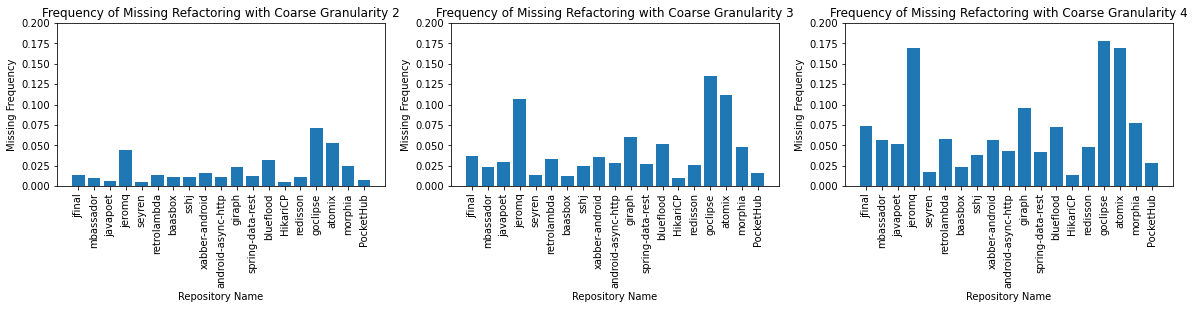

In [215]:
import matplotlib.pyplot as plt

#plot squash num 2
x=list()
y=list()

f = plt.figure(figsize=(20,3))
for i in range(0,3):
    x.append(range(len(l[i])))
    y.append(l[i].values())
    
    temp = f.add_subplot(1,3,i+1)
    temp.bar(x[-1],y[-1])
    
    temp.set_ylim(0.00,0.20)
    temp.set_xticks(range(len(l[i])))
    temp.set_xticklabels(l[i].keys(), rotation = 90)

    temp.set_title("Frequency of Missing Refactoring with Coarse Granularity "+str(i+2))
    temp.set_xlabel("Repository Name")
    temp.set_ylabel("Missing Frequency")
f.savefig("/Users/leichen/ResearchAssistant/effective_change.png",dpi=800,bbox_inches='tight')

## Box Plot for frequency of coarse-grained refactoring in 19 repositories

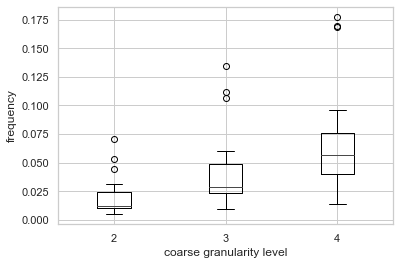

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

file = "/Users/leichen/ResearchAssistant/effective_squash/effective_squash(MSFexcluded).txt"
with open(file) as f:
    lines = f.readlines()
increaseDict = dict()

frequeny_level2_list = list()
frequency_list = [list() for _  in range(3)]

for line in lines:
    d = eval(line)
    frequency_list[d["squashNum"]-2].append(d["Effective squash ratio"])
    if d["squashNum"] ==2:
        frequeny_level2_list.append(d["Effective squash ratio"])
    
assert frequency_list[0] ==  frequeny_level2_list

#Box Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(frequency_list, labels=['2', '3', '4'])
ax.set_xlabel('coarse granularity level')
ax.set_ylabel('frequency')

fig.savefig("/Users/leichen/ResearchAssistant/frequency_boxplot.pdf",dpi=800,bbox_inches='tight')

plt.show()

In [209]:
file = "/Users/leichen/ResearchAssistant/effective_squash/effective_squash(MSFexcluded).txt"
with open(file) as f:
    lines = f.readlines()
l = list()
sumdict = dict()
squashNumDict = dict()
def dictAdd(dict1,dict2):
    for each in dict2:
        dict1[each] = dict1.get(each,0)+dict2[each]
    return dict1

for line in lines:
        d = eval(line)
        tempRepo = sumdict.get(d["repo"],dict())
        tempRepo = dictAdd(tempRepo,d["refactoring_result"])
        sumdict[d["repo"]] = tempRepo
        squashNumDict[d["repo"]] =  squashNumDict.get(d["repo"],0)+d["Effective squash num"]
# for each in sumdict:
#     print(each,sorted(sumdict[each].items(), key = lambda x:x[1],reverse = True))
# print(sumdict)
# print(squashNumDict)

def dictDivide(dict1,dict2):
    resDict = dict()
    try:
        for each in dict2:
            resDict[each] = dict1[each]/dict2[each]
    except KeyError:
            print("key error")
    return resDict
            
def dictDivide(dict1,num):
    resDict = dict()
    try:
        for each in dict1:
            resDict[each] = dict1[each]/num
    except KeyError:
            print("key error")
    return resDict
for each in sumdict:
    print(each, sumdict[each])

missingRatio = dict()
for each in sumdict:
    missingRatio[each] = dictDivide(sumdict[each],squashNumDict[each])

missing_type_number = dict()
for each in missingRatio:
    temp = sorted(missingRatio[each].items(),key = lambda x:x[1],reverse = True)[0:1]
    print("\t {} & {} & {} \\\\".format(each,temp[0][0],temp[0][1]))
    print("\t \\hline")
    missing_type_number[temp[0][0]] = missing_type_number.get(temp[0][0],0)+1

print("--------------------------------")
print(sorted(missing_type_number.items(),key=lambda x:x[1],reverse = True))

print("--------------------------------")
sumSquash = 0
for each in squashNumDict:
    sumSquash +=squashNumDict[each]
allMissingRatioDict = dict()
for each in sumdict:
    allMissingRatioDict  = dictAdd(allMissingRatioDict ,sumdict[each])
    allMissingRatioDict = dictDivide(allMissingRatioDict ,sumSquash)
print(sorted(allMissingRatioDict .items(),key = lambda x:x[1],reverse = True))

jfinal {'Change Method Access Modifier': 19, 'Rename Class': 3, 'Add Parameter': 7, 'Extract Attribute': 6, 'Remove Parameter': 8, 'Move And Rename Method': 16, 'Extract Method': 3, 'Modify Method Annotation': 1, 'Extract Variable': 3, 'Parameterize Variable': 3, 'Move And Rename Class': 1, 'Move And Inline Method': 1, 'Split Package': 1}
mbassador {'Change Parameter Type': 20, 'Move And Rename Class': 6, 'Change Class Access Modifier': 30, 'Change Method Access Modifier': 28, 'Move Class': 24, 'Rename Attribute': 3, 'Add Parameter': 12, 'Extract And Move Method': 2, 'Parameterize Attribute': 1}
javapoet {'Change Attribute Type': 2, 'Change Variable Type': 2, 'Rename Attribute': 2, 'Replace Variable With Attribute': 4, 'Change Attribute Access Modifier': 3, 'Pull Up Attribute': 3}
jeromq {'Remove Method Modifier': 11, 'Rename Variable': 1, 'Move And Inline Method': 1, 'Move Class': 12, 'Remove Method Annotation': 5, 'Add Class Modifier': 6, 'Move Method': 2, 'Pull Up Method': 3, 'Renam

Generate repository & commit number table

In [224]:
repo = ["jfinal", "mbassador", "javapoet", "jeromq", "seyren", "retrolambda","baasbox","sshj", "xabber-android", "android-async-http", "giraph", "spring-data-rest","blueflood", "HikariCP", "redisson","goclipse", "atomix", "morphia", "PocketHub"]
num = [476, 342, 846, 1292, 640, 530, 1706, 972, 4264, 899, 1137, 1496, 2981, 2799, 6955, 2925, 4268, 2621, 3512]
for i in range(len(repo)):
    print("\t {} & {} \\\\".format(repo[i],num[i]))
    print("\t \\hline")

	 jfinal & 476 \\
	 \hline
	 mbassador & 342 \\
	 \hline
	 javapoet & 846 \\
	 \hline
	 jeromq & 1292 \\
	 \hline
	 seyren & 640 \\
	 \hline
	 retrolambda & 530 \\
	 \hline
	 baasbox & 1706 \\
	 \hline
	 sshj & 972 \\
	 \hline
	 xabber-android & 4264 \\
	 \hline
	 android-async-http & 899 \\
	 \hline
	 giraph & 1137 \\
	 \hline
	 spring-data-rest & 1496 \\
	 \hline
	 blueflood & 2981 \\
	 \hline
	 HikariCP & 2799 \\
	 \hline
	 redisson & 6955 \\
	 \hline
	 goclipse & 2925 \\
	 \hline
	 atomix & 4268 \\
	 \hline
	 morphia & 2621 \\
	 \hline
	 PocketHub & 3512 \\
	 \hline
